# ABM 5 
## Cultural evolution

<p> We will simulate the cultural evolution of a medicinal cocktail through various rounds of recombination of an initial set of basic ingredients. <br>
The simulation was based on an experiment where pairs of individuals mixed virtual medicines to generate cocktails. Some unique combinations represented innovations of higher medicinal value. <br>
The end of the simulation occurs when a pair combines two lineages of cocktails A and B into a super drug cocktail C. 

Cultural evolution occurs in a social network, where edges differ by their weight (reflecting level of social contact). <br> 
So first we import the file with data on nodes, edges and weights.</p>

In [1]:
import networkx as nx
import random as rd
import numpy as np

net = 'agtanet.txt'
G = nx.read_weighted_edgelist(net, nodetype = int)
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 53
Number of edges: 477
Average degree:  18.0000


In [2]:
#list of nodes in G
G.nodes()

NodeView((0, 1, 2, 11, 20, 22, 23, 24, 25, 27, 31, 32, 33, 35, 36, 37, 38, 41, 43, 45, 13, 42, 44, 3, 4, 6, 7, 8, 15, 16, 21, 26, 28, 29, 30, 46, 5, 47, 48, 40, 9, 12, 14, 18, 19, 10, 17, 34, 39, 52, 49, 50, 51))

In [3]:
# important: G[i] lists all neighbours of node i in G
G[1] 

AtlasView({0: {'weight': 269.0}, 2: {'weight': 3.0}, 11: {'weight': 1.0}, 13: {'weight': 1.0}, 20: {'weight': 1.0}, 22: {'weight': 9.0}, 23: {'weight': 12.0}, 24: {'weight': 107.0}, 25: {'weight': 3.0}, 27: {'weight': 5.0}, 31: {'weight': 1.0}, 33: {'weight': 6.0}, 35: {'weight': 1.0}, 37: {'weight': 2.0}, 38: {'weight': 1.0}, 41: {'weight': 1.0}, 42: {'weight': 1.0}, 43: {'weight': 11.0}, 44: {'weight': 1.0}, 45: {'weight': 3.0}})

In [4]:
# would list all 477 edges
G.edges()

# all edges with data (weight) info
G.edges(data=True) 

# lists data (weight) on that edge
G[2][26] 

#G.has_edge(2,36) 

{'weight': 7.0}

<p> We have another file with info on kinship (relatedness) between the  nodes in each dyad.<br> 
Kinship is coded as kin = 10 (close kin), kin = 20 (distant kin), kin = 30 (non-kin). <br>
Let us import is as well with another name.</p>

In [5]:
kin = 'agtanetkin.txt'
file_kin = open(kin, "r") # 'open' reads kin and creates kinfile

line1 = file_kin.readlines(1) # thats how the start of kin was read
print(line1)

['0 1 269.0 10\n']


We need to read each line properly for our purposes 

In [6]:
for line in file_kin.readlines(1):
    print(line)
    elems0 = [x for x in line]
    elems1 = [x for x in line.split(" ")]
    elems2 = [x for x in line.strip("\n ").split(" ")]
    elems3 = [int(float(x)) for x in line.strip("\n ").split(" ")] # that's what we want 
    #elems4 = [float(x) if "." in x else int(x) for x in line.strip("\n ").split(" ")]
    
print(elems0)
print(elems1)
print(elems2)
print(elems3)
#print(elems4)

0 2 3.0 30

['0', ' ', '2', ' ', '3', '.', '0', ' ', '3', '0', '\n']
['0', '2', '3.0', '30\n']
['0', '2', '3.0', '30']
[0, 2, 3, 30]


In [7]:
Agtakin = 'agtanetkin.txt'
file_kin = open(Agtakin, "r") 

for line in file_kin.readlines(): 
    elems = [int(float(x)) if "e" in x or "." in x else int(x) for x in line.strip("\n ").split(" ")]
    i=int(elems[0]) # extracts i and j nodes from dyad
    j=int(elems[1])
    kinship= int(elems[3]/10) # so kinship is 1 for close kin, 2 for distant kin, 3 for non-kin
    #print(kinship)
    
    if G.has_edge(i,j) == True: # now check in G if (i, j) exists
        G[i][j]['kin']=kinship # if so, create variable kin with value kinship 

file_kin.close()

In [8]:
G.edges(data=True) # now edges in G have attribute weight and kin

EdgeDataView([(0, 1, {'weight': 269.0, 'kin': 1}), (0, 2, {'weight': 3.0, 'kin': 3}), (0, 11, {'weight': 1.0, 'kin': 3}), (0, 20, {'weight': 1.0, 'kin': 3}), (0, 22, {'weight': 1.0, 'kin': 3}), (0, 23, {'weight': 4.0, 'kin': 3}), (0, 24, {'weight': 115.0, 'kin': 3}), (0, 25, {'weight': 1.0, 'kin': 3}), (0, 27, {'weight': 2.0, 'kin': 3}), (0, 31, {'weight': 1.0, 'kin': 3}), (0, 32, {'weight': 1.0, 'kin': 3}), (0, 33, {'weight': 4.0, 'kin': 3}), (0, 35, {'weight': 1.0, 'kin': 3}), (0, 36, {'weight': 1.0, 'kin': 3}), (0, 37, {'weight': 1.0, 'kin': 3}), (0, 38, {'weight': 1.0, 'kin': 3}), (0, 41, {'weight': 2.0, 'kin': 3}), (0, 43, {'weight': 1.0, 'kin': 3}), (0, 45, {'weight': 2.0, 'kin': 3}), (1, 2, {'weight': 3.0, 'kin': 3}), (1, 11, {'weight': 1.0, 'kin': 3}), (1, 13, {'weight': 1.0, 'kin': 3}), (1, 20, {'weight': 1.0, 'kin': 3}), (1, 22, {'weight': 9.0, 'kin': 3}), (1, 23, {'weight': 12.0, 'kin': 3}), (1, 24, {'weight': 107.0, 'kin': 1}), (1, 25, {'weight': 3.0, 'kin': 2}), (1, 27, {'

Now we create a weighted network only with close kin

In [9]:
G_closekin = nx.Graph() # creates a new empty network
for i, j in G.edges:
    if G[i][j]['kin'] == 1: # if (i, j) dyad in G is kin = 1
        G_closekin.add_edge(i, j) # add that edge to new network
        G_closekin[i][j]['weight'] = G[i][j]['weight'] # add weight from G to new network 

In [10]:
print(len(G), len(G_closekin)) #size of close kin network

53 43


In [11]:
G_closekin.edges(data=True)

EdgeDataView([(0, 1, {'weight': 269.0}), (1, 24, {'weight': 107.0}), (2, 3, {'weight': 6.0}), (2, 7, {'weight': 7.0}), (2, 31, {'weight': 35.0}), (7, 31, {'weight': 8.0}), (31, 29, {'weight': 73.0}), (31, 30, {'weight': 64.0}), (31, 32, {'weight': 26.0}), (31, 33, {'weight': 114.0}), (11, 10, {'weight': 121.0}), (20, 16, {'weight': 61.0}), (20, 21, {'weight': 194.0}), (16, 18, {'weight': 114.0}), (16, 21, {'weight': 46.0}), (23, 40, {'weight': 46.0}), (23, 43, {'weight': 277.0}), (40, 43, {'weight': 62.0}), (25, 26, {'weight': 5.0}), (25, 27, {'weight': 49.0}), (25, 28, {'weight': 81.0}), (25, 42, {'weight': 38.0}), (25, 45, {'weight': 5.0}), (26, 27, {'weight': 8.0}), (26, 28, {'weight': 19.0}), (27, 28, {'weight': 2.0}), (27, 42, {'weight': 30.0}), (28, 42, {'weight': 57.0}), (28, 29, {'weight': 333.0}), (45, 44, {'weight': 188.0}), (29, 32, {'weight': 2.0}), (29, 33, {'weight': 24.0}), (29, 30, {'weight': 19.0}), (30, 33, {'weight': 11.0}), (32, 33, {'weight': 47.0}), (36, 34, {'wei

We add the missing 10 nodes from G so that they can be found in G_closekin, but as isolates (no edges) since they have not close kin

In [12]:
for node in G: 
    if node not in G_closekin:
        G_closekin.add_node(node)

In [13]:
print(len(G), len(G_closekin))

53 53


<p> Now we go back to G.<br>
We want to select one from all possible neighbours of each G node, taking into account edge weights (= the strength of social bond between node and neighbour)<br>
As a result, every node will have a partner in that round.

In [14]:
rounds = 1
# purpose of this loop is to select one neighbour 
for x in range(rounds): 
    global node, selected_neighbour
    random_node_list = rd.sample(range(len(G)), len(G)) # select G nodes in random order
    for node in random_node_list: # for each node in random list
        neighbour_list = []
        for neighbour in G[node]: # G[node] = all neighbours of node
            for times in range(int(G[node][neighbour]['weight'])): # counts weight x of a link
                neighbour_list.append(neighbour) # and adds that neighbour x times to neighbour_list  
        selected_neighbour = rd.choice(neighbour_list) # then selects one neighbour from the list 
        print(node, selected_neighbour) # print each node neighbour pair

51 52
21 13
37 34
43 39
8 5
18 16
34 35
30 7
38 23
1 0
41 36
12 14
0 24
26 2
7 3
4 7
48 47
15 19
14 16
28 29
10 20
42 41
33 31
45 44
35 38
25 13
44 6
40 43
36 37
50 49
9 15
20 19
5 6
27 42
11 10
2 3
32 31
6 4
22 38
49 52
39 34
24 1
13 21
23 22
16 11
29 28
52 49
47 48
17 19
31 45
19 13
3 29
46 48


Next we give a set of basic medicinal drugs to each none. <br> 
We do it by creating an incidence matrix with rows = nodes, columns = medicines <br >
We start with 6 basic drugs, and room for innovations (new drugs)

In [15]:
# number of rows (individuals) is the size of G
# each column (tool or drug) is present (0) or absent (-1); we start with 6 0s and 8 -1s 
matrix_node_tools=[[0]*6 + [-1]*8 for i in range (len(G))]
matrix_node_tools

[[0, 0, 0, 0, 0, 0, -1, -1, -1, -1, -1, -1, -1, -1],
 [0, 0, 0, 0, 0, 0, -1, -1, -1, -1, -1, -1, -1, -1],
 [0, 0, 0, 0, 0, 0, -1, -1, -1, -1, -1, -1, -1, -1],
 [0, 0, 0, 0, 0, 0, -1, -1, -1, -1, -1, -1, -1, -1],
 [0, 0, 0, 0, 0, 0, -1, -1, -1, -1, -1, -1, -1, -1],
 [0, 0, 0, 0, 0, 0, -1, -1, -1, -1, -1, -1, -1, -1],
 [0, 0, 0, 0, 0, 0, -1, -1, -1, -1, -1, -1, -1, -1],
 [0, 0, 0, 0, 0, 0, -1, -1, -1, -1, -1, -1, -1, -1],
 [0, 0, 0, 0, 0, 0, -1, -1, -1, -1, -1, -1, -1, -1],
 [0, 0, 0, 0, 0, 0, -1, -1, -1, -1, -1, -1, -1, -1],
 [0, 0, 0, 0, 0, 0, -1, -1, -1, -1, -1, -1, -1, -1],
 [0, 0, 0, 0, 0, 0, -1, -1, -1, -1, -1, -1, -1, -1],
 [0, 0, 0, 0, 0, 0, -1, -1, -1, -1, -1, -1, -1, -1],
 [0, 0, 0, 0, 0, 0, -1, -1, -1, -1, -1, -1, -1, -1],
 [0, 0, 0, 0, 0, 0, -1, -1, -1, -1, -1, -1, -1, -1],
 [0, 0, 0, 0, 0, 0, -1, -1, -1, -1, -1, -1, -1, -1],
 [0, 0, 0, 0, 0, 0, -1, -1, -1, -1, -1, -1, -1, -1],
 [0, 0, 0, 0, 0, 0, -1, -1, -1, -1, -1, -1, -1, -1],
 [0, 0, 0, 0, 0, 0, -1, -1, -1, -1, -1, -1, -1

Each tool has a fitness or medicinal value, and we are using the original values in Derex and Boyd's original experiment

In [16]:
fitness_values = [6, 8, 10, 6, 8, 10, 30, 30, 60, 60, 120, 120, 300, 300] # each column has a value

Now we create a dictionary with the special combinations of 3 drugs that generate a superior drug. <br>
Notice that there are two lineages: in lineage A, triad (0, 1, 2) creates drug 6 (A1), which is needed for drug 8 or A2 = (0, 4, 6), which is needed for drug 10. <br>
Therefore lineage A is A1 = 6, A2 = 8, A3 = 10. <br>
Lineage B will be B1 = 7, B2 = 9, B3 = 11. <br>
The superdrug C is a combination of top A and B, with two options: superdrug 12 = (A2, A3, B3), or superdrug 13 = (B2, B3, A3) <br>
(to avoid privileging A or B)

In [17]:
innovations_dict = {(0, 1, 2): 6, 
             (3, 4, 5): 7,
             (0, 4, 6): 8,
             (1, 2, 7): 9,
             (4, 5, 8): 10,
             (1, 3, 9): 11,
             (8, 10, 11): 12,
             (9, 10, 11): 13}

Now the pairs can start playing. First we create the lists of drugs of node and neighbour

In [18]:
# ingredients of node are 0s in matrix, so we select for each node (row) column where value is > -1
print(node) # this value is stored from a previous loop
ingredients_node= np.where(np.array(matrix_node_tools[node])>-1)[0] # don't forget to select element [0]
print(ingredients_node)
ingredients_neighbour=np.where(np.array(matrix_node_tools[selected_neighbour])>-1)[0]
print(ingredients_neighbour)


46
[0 1 2 3 4 5]
[0 1 2 3 4 5]


From their original sets above, they choose tools based on drug value. <br>
To create the drug triad, node selects 2 of its drugs, and neighbour selects 1 

In [19]:
node_tools=[] #weigthed sampling
for tool in ingredients_node:
    for times in range(fitness_values[tool]):
        node_tools.append(tool)
node_tool_1, node_tool_2 = rd.sample(node_tools, 2)
print(node_tool_1, node_tool_2)

2 2


In [20]:
neighbour_tools=[]
for tool in ingredients_neighbour:
    for times in range(fitness_values[tool]):
        neighbour_tools.append(tool)
neighbour_tool = rd.choice(neighbour_tools)
print(neighbour_tool)

4


In [21]:
# just as a test: how to combine the drugs and see if chosen triad generated a new drug
triad = [node_tool_1, node_tool_2, neighbour_tool] # create triad
triad = tuple(sorted(triad)) # sort order
print(triad)
new_tool = innovations_dict.get(triad, -1) 
print(new_tool)
#if triad is in dictionary, returns its key or ID (6, 7 etc), otherwise -1 or absent

(2, 2, 4)
-1


Now we put the elements above together to run the attepmts until a new drug is created

In [22]:
rounds=10000 
stop_sim=0 # simulation starts
for epoch in range(rounds):
    random_node_list = rd.sample(range(len(G)), len(G))
    for node in random_node_list: # select pairs
        neighbour_list = []
        for neighbour in G[node]:
            for times in range(int(G[node][neighbour]['weight'])):
                neighbour_list.append(neighbour)
        selected_neighbour = rd.choice(neighbour_list)
        
        ingredients_node=np.where(np.array(matrix_node_tools[node])>-1)[0] # take their current drugs
        ingredients_neighbour=np.where(np.array(matrix_node_tools[selected_neighbour])>-1)[0]
        
        node_tools=[] # drugs chosen for triad
        for tool in ingredients_node:
            for times in range(fitness_values[tool]):
                node_tools.append(tool)
        node_tool_1, node_tool_2 = rd.sample(node_tools, 2)
        
        neighbour_tools=[]
        for tool in ingredients_neighbour:
            for times in range(fitness_values[tool]):
                neighbour_tools.append(tool)
        neighbour_tool = rd.choice(neighbour_tools)
        
        triad = [node_tool_1, node_tool_2, neighbour_tool] # tirad generates a new tool or nothing
        triad = tuple(sorted(triad))
        new_tool = innovations_dict.get(triad,-1) 
        
        if new_tool > -1: # when a new tool is created, print which drug, round, and players
            print(new_tool, epoch + 1, node, selected_neighbour)
            stop_sim=1
            break
    if stop_sim==1: # then stop
        break

7 1 39 34


Now we will run a simulation where any new drugs are transmitted only to close kin

In [23]:
periods=10000
stop_sim=0
sim_duration = []
for epoch in range(periods):
    random_node_list = rd.sample(range(len(G)), len(G))
    for node in random_node_list:
        neighbour_list = []
        for neighbour in G[node]:
            for times in range(int(G[node][neighbour]['weight'])):
                neighbour_list.append(neighbour)
        selected_neighbour = rd.choice(neighbour_list)
       
        ingredients_node=np.where(np.array(matrix_node_tools[node])>-1)[0] 
        ingredients_neighbour=np.where(np.array(matrix_node_tools[selected_neighbour])>-1)[0]
        
        node_tools=[]
        for tool in ingredients_node:
            for times in range(fitness_values[tool]):
                node_tools.append(tool)
        node_tool_1, node_tool_2 = rd.sample(node_tools, 2)
        
        neighbour_tools=[]
        for tool in ingredients_neighbour:
            for times in range(fitness_values[tool]):
                neighbour_tools.append(tool)
        neighbour_tool = rd.choice(neighbour_tools)
  
        triad = [node_tool_1, node_tool_2, neighbour_tool]
        triad = tuple(sorted(triad))
        new_tool = innovations_dict.get(triad,-1)
        
        # until here, similar to previous cell  
        
        if new_tool > -1: # if a new drug was created (6, 7 or 8 etc) 
            # check if node and neighbour already have invented tool 
            have_new_tool = -1 # we need this later
            if matrix_node_tools[node][new_tool] == -1: # if position (i = node, j = new tool) in matrix is absent
                have_new_tool = 1 
                matrix_node_tools[node][new_tool] = epoch + 1 # node gains new tools, replace -1 with round of discovery
                for node_kin in G_closekin[node]: # now use matrix G_closekin to identify all close kin of node 
                    matrix_node_tools[node_kin][new_tool] = epoch + 1 # tranmits new tool to all kin
            
            if matrix_node_tools[selected_neighbour][new_tool] == -1: #check if selected neighbour has tool
                have_new_tool = 1 
                matrix_node_tools[selected_neighbour][new_tool]= epoch + 1 # neighbours gains new tool
                for neighbour_kin in G_closekin[selected_neighbour]:
                    matrix_node_tools[neighbour_kin][new_tool] = epoch+ 1

            if have_new_tool == 1: #if either node or neighbour received the new tool
                print(new_tool, epoch + 1, node, selected_neighbour)
                if new_tool in [12,13]: # BUT if the new tool is a superdrug C1=12 or C2=13
                    stop_sim=1 # simulations ends
                    
        if stop_sim==1:
            break
    if stop_sim==1:
        break

7 1 10 39
7 1 7 26
6 1 48 47
7 2 32 33
9 2 35 34
7 2 42 29
7 3 6 45
6 3 24 1
9 3 2 15
7 4 43 22
7 4 16 17
11 5 29 2
7 5 8 45
9 6 10 16
9 7 6 26
6 7 49 51
6 7 42 41
9 8 13 20
9 8 8 3
9 10 22 38
11 11 17 18
8 11 51 50
6 12 9 21
6 13 4 26
11 14 43 34
11 15 14 21
10 16 49 50
8 19 4 29
6 20 45 6
8 26 47 46
7 31 1 0
7 36 19 13
8 36 0 1
8 37 5 4
9 39 23 39
10 41 46 47
11 42 34 35
9 48 17 16
9 55 24 0
8 57 45 44
8 58 42 2
8 62 13 21
6 63 30 26
11 63 20 13
10 67 26 7
12 69 30 31


We can examine matrix to see when drugs were discovered and who created the superdrug <br>
(can you interpret it?)

In [24]:
matrix_node_tools

[[0, 0, 0, 0, 0, 0, -1, 31, 36, 55, -1, -1, -1, -1],
 [0, 0, 0, 0, 0, 0, 3, 31, 36, 55, -1, -1, -1, -1],
 [0, 0, 0, 0, 0, 0, -1, 1, 58, 3, 67, 5, -1, -1],
 [0, 0, 0, 0, 0, 0, -1, -1, 58, 3, -1, 5, -1, -1],
 [0, 0, 0, 0, 0, 0, 13, -1, 19, -1, -1, -1, -1, -1],
 [0, 0, 0, 0, 0, 0, 20, 3, 37, 7, -1, -1, -1, -1],
 [0, 0, 0, 0, 0, 0, 20, 3, 37, 7, -1, -1, -1, -1],
 [0, 0, 0, 0, 0, 0, -1, 1, 58, 3, 67, 5, -1, -1],
 [0, 0, 0, 0, 0, 0, -1, 5, -1, 8, -1, -1, -1, -1],
 [0, 0, 0, 0, 0, 0, 12, -1, -1, -1, -1, -1, -1, -1],
 [0, 0, 0, 0, 0, 0, -1, 1, -1, 6, -1, -1, -1, -1],
 [0, 0, 0, 0, 0, 0, -1, 1, -1, 6, -1, -1, -1, -1],
 [0, 0, 0, 0, 0, 0, -1, -1, -1, -1, -1, 15, -1, -1],
 [0, 0, 0, 0, 0, 0, -1, 36, 62, 8, -1, 63, -1, -1],
 [0, 0, 0, 0, 0, 0, -1, -1, -1, -1, -1, 15, -1, -1],
 [0, 0, 0, 0, 0, 0, -1, -1, -1, 3, -1, -1, -1, -1],
 [0, 0, 0, 0, 0, 0, 12, 4, 62, 6, -1, 15, -1, -1],
 [0, 0, 0, 0, 0, 0, -1, 4, -1, 48, -1, 11, -1, -1],
 [0, 0, 0, 0, 0, 0, -1, 4, -1, 48, -1, 11, -1, -1],
 [0, 0, 0, 0, 0, 0

## The code below implements the simulation multiple times (parameter 'sims'), and plots a distribution of rounds until discovery of superdrug.

* This cell imports and prepares the files, therefore needs to be run only once

In [25]:
net = 'agtanet.txt'
G = nx.read_weighted_edgelist(net, nodetype = int)

Agtakin = 'agtanetkin.txt'
file_kin = open(Agtakin, "r") 
for line in file_kin.readlines(): 
    elems = [int(float(x)) if "e" in x or "." in x else int(x) for x in line.strip("\n ").split(" ")]
    i=int(elems[0]) # extracts i and j nodes from dyad
    j=int(elems[1])
    kinship= int(elems[3]/10) # so kinship is 1 for close kin, 2 for distant kin, 3 for non-kin
    #print(kinship)
    if G.has_edge(i,j) == True: # now check in G if (i, j) exists
        G[i][j]['kin']=kinship # if so, create variable kin with value kinship 
file_kin.close()

* This cell should be re-run everytime you change number of sims, conditions etc.

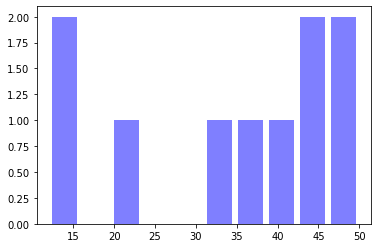

Simulations =  10
Mean time to discovery of C1/C2 =  34.4 rounds


In [26]:
import networkx as nx
import random as rd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

sims = 10
sim_duration = [] # to store each simulation duration 

# beginning of simulations
for i in range(sims):
    G_closekin = nx.Graph() # creates a new empty network
    for i, j in G.edges:
        if G[i][j]['kin'] == 1: # if (i, j) dyad in G is kin = 1
            G_closekin.add_edge(i, j) # add that edge to new network
            G_closekin[i][j]['weight'] = G[i][j]['weight'] # add weight from G to new network 

    for node in G: 
        if node not in G_closekin:
            G_closekin.add_node(node)

    matrix_node_tools=[[0]*6 + [-1]*8 for i in range (len(G))]
    fitness_values = [6, 8, 10, 6, 8, 10, 30, 30, 60, 60, 120, 120, 300, 300] # each column has a value
    innovations_dict = {(0, 1, 2): 6, 
                 (3, 4, 5): 7,
                 (0, 4, 6): 8,
                 (1, 2, 7): 9,
                 (4, 5, 8): 10,
                 (1, 3, 9): 11,
                 (8, 10, 11): 12,
                 (9, 10, 11): 13}

    periods=10000
    stop_sim=0   
    for epoch in range(periods):
        random_node_list = rd.sample(range(len(G)), len(G))
        for node in random_node_list:
            neighbour_list = []
            for neighbour in G[node]:
                for times in range(int(G[node][neighbour]['weight'])):
                    neighbour_list.append(neighbour)
            selected_neighbour = rd.choice(neighbour_list)

            ingredients_node=np.where(np.array(matrix_node_tools[node])>-1)[0] 
            ingredients_neighbour=np.where(np.array(matrix_node_tools[selected_neighbour])>-1)[0]

            node_tools=[]
            for tool in ingredients_node:
                for times in range(fitness_values[tool]):
                    node_tools.append(tool)
            node_tool_1, node_tool_2 = rd.sample(node_tools, 2)

            neighbour_tools=[]
            for tool in ingredients_neighbour:
                for times in range(fitness_values[tool]):
                    neighbour_tools.append(tool)
            neighbour_tool = rd.choice(neighbour_tools)

            triad = [node_tool_1, node_tool_2, neighbour_tool]
            triad = tuple(sorted(triad))
            new_tool = innovations_dict.get(triad,-1)

            # until here, similar to previous cell  

            if new_tool > -1: # if a new drug was created (6, 7 or 8 etc) 
                # check if node and neighbour already have invented tool 
                have_new_tool = -1 # we need this later
                if matrix_node_tools[node][new_tool] == -1: # if position (i = node, j = new tool) in matrix is absent
                    have_new_tool = 1 
                    matrix_node_tools[node][new_tool] = epoch + 1 # node gains new tools, replace -1 with round of discovery
                    for node_kin in G_closekin[node]: # now use matrix G_closekin to identify all close kin of node 
                        matrix_node_tools[node_kin][new_tool] = epoch + 1 # tranmits new tool to all kin

                if matrix_node_tools[selected_neighbour][new_tool] == -1: #check if selected neighbour has tool
                    have_new_tool = 1 
                    matrix_node_tools[selected_neighbour][new_tool]= epoch + 1 # neighbours gains new tool
                    for neighbour_kin in G_closekin[selected_neighbour]:
                        matrix_node_tools[neighbour_kin][new_tool] = epoch+ 1

                if have_new_tool == 1: #if either node or neighbour received the new tool
                    #print(new_tool, epoch + 1, node, selected_neighbour)
                    if new_tool in [12,13]: # BUT if the new tool is a superdrug C1=12 or C2=13
                        stop_sim=1 # simulations ends
                        sim_duration.append(epoch + 1)                        
            if stop_sim==1:
                break
        if stop_sim==1:
            break

plt.hist(sim_duration, facecolor='b', alpha=.5, rwidth=.8)
plt.show()
print("Simulations = ", sims)
print("Mean time to discovery of C1/C2 = ", np.mean(sim_duration), "rounds")

## Exercise 1

Modify the code so that:
* Instead of transferring the new tool only to close kin, both node and neighbour transmit new tools to **all** their neighbours 



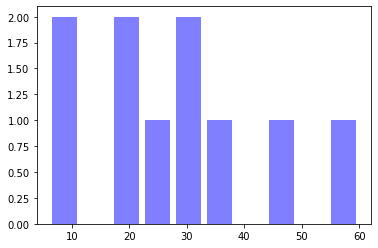

Simulations =  10
Mean time to discovery of C1/C2 =  27.8 rounds


In [27]:
import networkx as nx
import random as rd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

sims = 10
sim_duration = [] # to store each simulation duration 

# beginning of simulations
for i in range(sims):
    G_closekin = nx.Graph() # creates a new empty network
    for i, j in G.edges:
        if G[i][j]['kin'] == 1: # if (i, j) dyad in G is kin = 1
            G_closekin.add_edge(i, j) # add that edge to new network
            G_closekin[i][j]['weight'] = G[i][j]['weight'] # add weight from G to new network 

    for node in G: 
        if node not in G_closekin:
            G_closekin.add_node(node)

    matrix_node_tools=[[0]*6 + [-1]*8 for i in range (len(G))]
    fitness_values = [6, 8, 10, 6, 8, 10, 30, 30, 60, 60, 120, 120, 300, 300] # each column has a value
    innovations_dict = {(0, 1, 2): 6, 
                 (3, 4, 5): 7,
                 (0, 4, 6): 8,
                 (1, 2, 7): 9,
                 (4, 5, 8): 10,
                 (1, 3, 9): 11,
                 (8, 10, 11): 12,
                 (9, 10, 11): 13}

    periods=10000
    stop_sim=0   
    for epoch in range(periods):
        random_node_list = rd.sample(range(len(G)), len(G))
        for node in random_node_list:
            neighbour_list = []
            for neighbour in G[node]:
                for times in range(int(G[node][neighbour]['weight'])):
                    neighbour_list.append(neighbour)
            selected_neighbour = rd.choice(neighbour_list)

            ingredients_node=np.where(np.array(matrix_node_tools[node])>-1)[0] 
            ingredients_neighbour=np.where(np.array(matrix_node_tools[selected_neighbour])>-1)[0]

            node_tools=[]
            for tool in ingredients_node:
                for times in range(fitness_values[tool]):
                    node_tools.append(tool)
            node_tool_1, node_tool_2 = rd.sample(node_tools, 2)

            neighbour_tools=[]
            for tool in ingredients_neighbour:
                for times in range(fitness_values[tool]):
                    neighbour_tools.append(tool)
            neighbour_tool = rd.choice(neighbour_tools)

            triad = [node_tool_1, node_tool_2, neighbour_tool]
            triad = tuple(sorted(triad))
            new_tool = innovations_dict.get(triad,-1)

            # until here, similar to previous cell  

            if new_tool > -1: # if a new drug was created (6, 7 or 8 etc) 
                # check if node and neighbour already have invented tool 
                have_new_tool = -1 # we need this later
                if matrix_node_tools[node][new_tool] == -1: # if position (i = node, j = new tool) in matrix is absent
                    have_new_tool = 1 
                    matrix_node_tools[node][new_tool] = epoch + 1 # node gains new tools, replace -1 with round of discovery
                    for allneibs in G[node]: # now use matrix G_closekin to identify all close kin of node 
                        matrix_node_tools[allneibs][new_tool] = epoch + 1 # tranmits new tool to all kin

                if matrix_node_tools[selected_neighbour][new_tool] == -1: #check if selected neighbour has tool
                    have_new_tool = 1 
                    matrix_node_tools[selected_neighbour][new_tool]= epoch + 1 # neighbours gains new tool
                    for allneibneibs in G[selected_neighbour]:
                        matrix_node_tools[allneibneibs][new_tool] = epoch+ 1

                if have_new_tool == 1: #if either node or neighbour received the new tool
                    #print(new_tool, epoch + 1, node, selected_neighbour)
                    if new_tool in [12,13]: # BUT if the new tool is a superdrug C1=12 or C2=13
                        stop_sim=1 # simulations ends
                        sim_duration.append(epoch + 1)                        
            if stop_sim==1:
                break
        if stop_sim==1:
            break

plt.hist(sim_duration, facecolor='b', alpha=.5, rwidth=.8)
plt.show()
print("Simulations = ", sims)
print("Mean time to discovery of C1/C2 = ", np.mean(sim_duration), "rounds")

## Exercise 2
Modify code so that instead of the Agta network, you play the game with a *complete* or fully connected network of the same size. <br>
Notes: <br>
* to create a complete graph of size n, use:  C = nx.complete_graph(53) (default is undirected) <br>
* you have to remove selection based on weights of links, since the complete graph has no weigths. Select neighbour randomly.

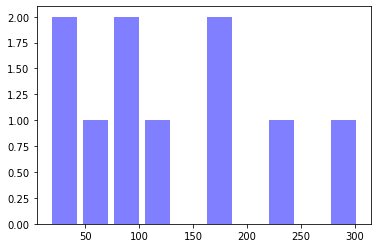

Simulations =  10
Mean time to discovery of C1/C2 =  128.8 rounds


In [28]:
import networkx as nx
import random as rd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

G = nx.complete_graph(53)

sims = 10
sim_duration = [] # to store each simulation duration 

# beginning of simulations
for i in range(sims):

    matrix_node_tools=[[0]*6 + [-1]*8 for i in range (len(G))]
    fitness_values = [6, 8, 10, 6, 8, 10, 30, 30, 60, 60, 120, 120, 300, 300] # each column has a value
    innovations_dict = {(0, 1, 2): 6, 
                 (3, 4, 5): 7,
                 (0, 4, 6): 8,
                 (1, 2, 7): 9,
                 (4, 5, 8): 10,
                 (1, 3, 9): 11,
                 (8, 10, 11): 12,
                 (9, 10, 11): 13}

    periods=10000
    stop_sim=0   
    for epoch in range(periods):
        random_node_list = rd.sample(range(len(G)), len(G))
        for node in random_node_list:
            neighbour_list = []
            for neighbour in G[node]:
                neighbour_list.append(neighbour)
            selected_neighbour = rd.choice(neighbour_list)

            ingredients_node=np.where(np.array(matrix_node_tools[node])>-1)[0] 
            ingredients_neighbour=np.where(np.array(matrix_node_tools[selected_neighbour])>-1)[0]

            node_tools=[]
            for tool in ingredients_node:
                for times in range(fitness_values[tool]):
                    node_tools.append(tool)
            node_tool_1, node_tool_2 = rd.sample(node_tools, 2)

            neighbour_tools=[]
            for tool in ingredients_neighbour:
                for times in range(fitness_values[tool]):
                    neighbour_tools.append(tool)
            neighbour_tool = rd.choice(neighbour_tools)

            triad = [node_tool_1, node_tool_2, neighbour_tool]
            triad = tuple(sorted(triad))
            new_tool = innovations_dict.get(triad,-1)

            # until here, similar to previous cell  

            if new_tool > -1: # if a new drug was created (6, 7 or 8 etc) 
                # check if node and neighbour already have invented tool 
                have_new_tool = -1 # we need this later
                if matrix_node_tools[node][new_tool] == -1: # if position (i = node, j = new tool) in matrix is absent
                    have_new_tool = 1 
                    matrix_node_tools[node][new_tool] = epoch + 1 # node gains new tools, replace -1 with round of discovery
                    for allneibs in G[node]: # now use matrix G_closekin to identify all close kin of node 
                        matrix_node_tools[allneibs][new_tool] = epoch + 1 # tranmits new tool to all kin

                if matrix_node_tools[selected_neighbour][new_tool] == -1: #check if selected neighbour has tool
                    have_new_tool = 1 
                    matrix_node_tools[selected_neighbour][new_tool]= epoch + 1 # neighbours gains new tool
                    for allneibneibs in G[selected_neighbour]:
                        matrix_node_tools[allneibneibs][new_tool] = epoch+ 1

                if have_new_tool == 1: #if either node or neighbour received the new tool
                    #print(new_tool, epoch + 1, node, selected_neighbour)
                    if new_tool in [12,13]: # BUT if the new tool is a superdrug C1=12 or C2=13
                        stop_sim=1 # simulations ends
                        sim_duration.append(epoch + 1)                        
            if stop_sim==1:
                break
        if stop_sim==1:
            break

plt.hist(sim_duration, facecolor='b', alpha=.5, rwidth=.8)
plt.show()
print("Simulations = ", sims)
print("Mean time to discovery of C1/C2 = ", np.mean(sim_duration), "rounds")